# Naive Bayes
ref: https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44  
dataset: https://www.kaggle.com/c/titanic/data


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1.將資料集讀入

df = pd.read_csv('./titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 2.將sex, embarked欄位做編碼
df['Sex'] = pd.Categorical(df['Sex']).codes
df['Embarked'] = pd.Categorical(df['Embarked']).codes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [4]:
#3.移除含有缺失值之row
df = df.dropna()

In [7]:
# 4.使用"Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"欄位來定義特徵向量X
# 5.使用"Survived"來定義y
X = np.asarray(df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])
y = np.asarray(df[["Survived"]]).flatten()

print(X.shape)
print(y.shape)
print(y)

(185, 7)
(185,)
[1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1]


In [8]:
#6.將資料集 8:2分成訓練資料及測試資料(假設 random_state=1)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
#7.將訓練資料做標準化
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [10]:
#8.建立機器學習模型並訓練
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [11]:
#9.將測試資料做標準化並用訓練好的模型做預測
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [12]:
#10.驗證模型結果
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: {}'.format(con_matrix))

number of correct sample: 30
accuracy: 0.8108108108108109
confusion matrix: [[13  3]
 [ 4 17]]


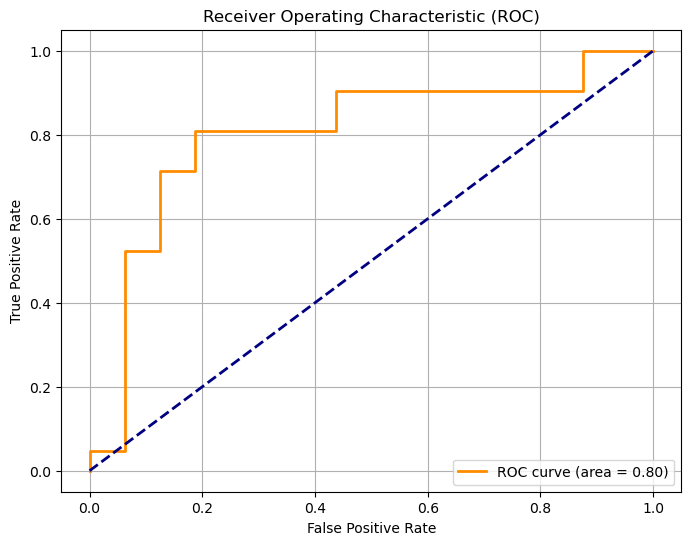

In [19]:
#11.計算預測機率
y_prob = model.predict_proba(X_test)[:, 1]

#12.計算 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#13.繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()
